In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

import seaborn as sns
np.set_printoptions(suppress=True)


In [2]:
from vega_datasets import data
df = data.sf_temps()


In [3]:
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


Resample by the day and take the average temperature. Visualize the average temperature over time.

Write the code necessary to visualize the minimum temperature over time.

Write the code necessary to visualize the maximum temperature over time.

Which month is the coldest, on average?

Which month has the highest average temperature?

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled 
dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [4]:

df = df.set_index('date').sort_index()

In [5]:
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


<AxesSubplot:xlabel='date'>

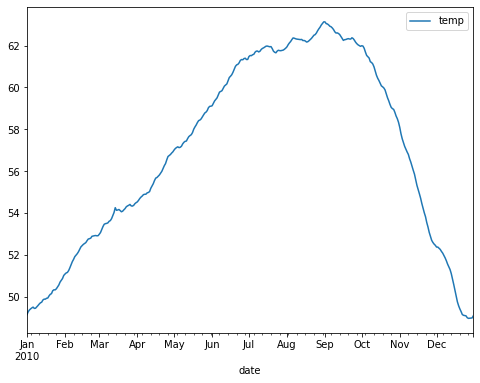

In [6]:

df.resample('D').mean().plot()


<AxesSubplot:xlabel='date'>

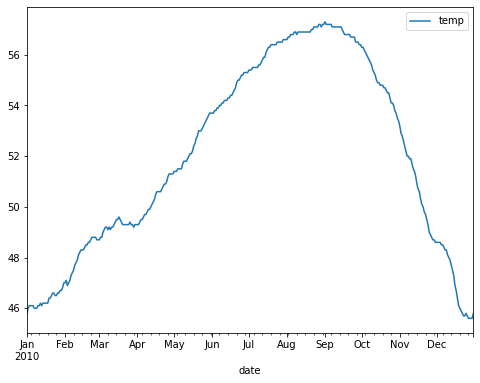

In [7]:

df.resample('D').min().plot()


<AxesSubplot:xlabel='date'>

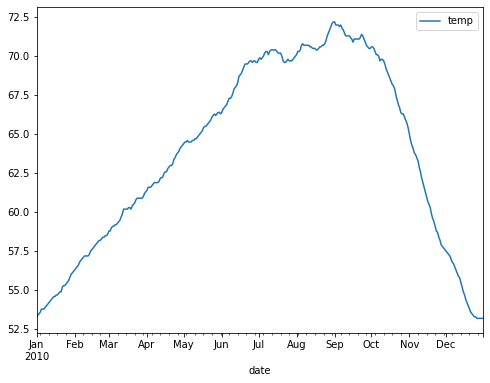

In [8]:

df.resample('D').max().plot()


<AxesSubplot:xlabel='date'>

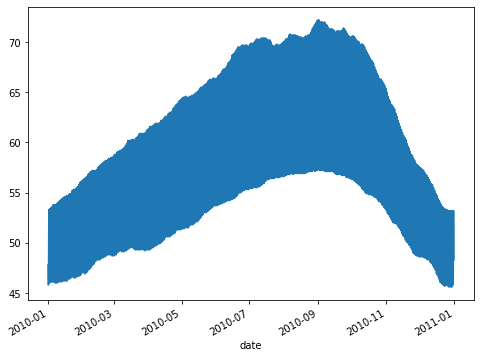

In [9]:
df.temp.plot()


In [12]:

# Which month is the coldest, on average?

df.resample('M').mean().temp.sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

In [11]:
# Which month has the highest average temperature?
df.temp.resample('M').mean()

date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
2010-10-31    60.253091
2010-11-30    55.185139
2010-12-31    50.498253
Freq: M, Name: temp, dtype: float64

In [13]:
# 6. Resample by the day and calculate the min and max temp for the day 
# (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in
# temperature for the day. Which month has the highest daily temperature variability?

daily = df.temp.resample('D').agg(['min', 'max'])
daily.head()


,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [16]:
from vega_datasets import data
df = data.seattle_weather()


In [17]:
df.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Which year and month combination has the highest amount of precipitation?

Visualize the amount of monthly precipitation over time.

Visualize the amount of wind over time. Choose a time 
interval you think is appropriate.

Which year-month combination is the windiest?

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In which month does it rain the most?

Which month has the most number of days with a non-zero amount of precipitation?

In [18]:
# set date as index and sort index

df = df.set_index('date').sort_index()


In [21]:
#df.resample('M').sum().precipitation.sort_values().tail(5)
df.resample('M').sum().precipitation.sort_values().tail(5)

date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

<AxesSubplot:xlabel='date'>

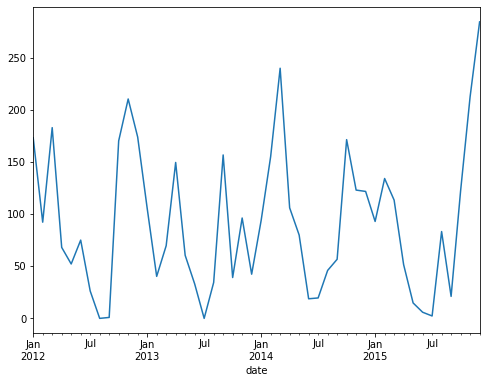

In [22]:

df.precipitation.resample('M').sum().plot()


<AxesSubplot:xlabel='date'>

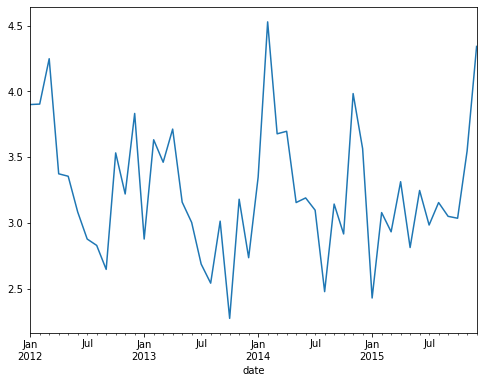

In [23]:

df.wind.resample('M').mean().plot()


In [26]:
df.resample('M').mean().wind.sort_values().tail()

date
2012-02-29    3.903448
2014-11-30    3.983333
2012-03-31    4.248387
2015-12-31    4.341935
2014-02-28    4.528571
Name: wind, dtype: float64

In [27]:

df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [28]:
# make a new column 'is_sunny'
df['is_sunny'] = df.weather == 'sun'


In [29]:

df.resample('Y').is_sunny.mean()

date
2012-12-31    0.322404
2013-12-31    0.561644
2014-12-31    0.578082
2015-12-31    0.493151
Freq: A-DEC, Name: is_sunny, dtype: float64

In [30]:
# In which month does it rain the most?

df['month'] = df.index.month

In [31]:
# did it rain?
df['did_rain'] = df.precipitation > 0

In [32]:

df.groupby('month').did_rain.mean().sort_values().tail(5)

month
1     0.532258
3     0.588710
11    0.591667
2     0.646018
12    0.653226
Name: did_rain, dtype: float64

## Flight Data

In [38]:
df = data.flights_20k()


Convert any negative delays to 0.

In [39]:
def delay_to_zero(x):
    if x < 0:
        x = 0
    return x    

In [40]:
df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [41]:
df.delay = df.delay.apply(delay_to_zero)


In [46]:
df

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND


In [43]:
df.delay = np.where(df.delay < 0, 0, df.delay)

Which hour of the day has the highest average delay?


In [45]:
# set date as index and sort index

df = df.set_index('date').sort_index()

KeyError: "None of ['date'] are in the columns"

In [53]:
df['hour'] = df.index.hour


df.groupby('hour').delay.mean().sort_values().tail(5)

hour
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

In [51]:
df.resample('H').sum().delay.sort_values().tail()

date
2001-02-09 20:00:00     877
2001-02-09 13:00:00     893
2001-01-12 21:00:00     922
2001-01-12 20:00:00     927
2001-01-12 19:00:00    1056
Name: delay, dtype: int64

Does the day of the week make a difference in the delay amount?

In [55]:
df['week day'] = df.index.day_name()

In [57]:

df.groupby('week day').delay.mean().sort_values()

week day
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

Does the month make a difference in the delay amount?


In [58]:
df['month'] = df.index.month

In [60]:
df.groupby('month').delay.mean().sort_values()

month
3     9.875287
1    11.301592
2    12.306106
Name: delay, dtype: float64